https://www.tutorialspoint.com/r/r_random_forest.htm
http://rischanlab.github.io/RandomForest.html
https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/
http://www.listendata.com/2014/11/random-forest-with-r.html
https://stackoverflow.com/questions/28666066/get-the-accuracy-of-a-random-forest-in-r
http://rstudio-pubs-static.s3.amazonaws.com/27155_519e7e23601048d08eb8a74d2a01ad2f.html

In [4]:
install.packages("randomForest")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [5]:
install.packages("multcomp")
library(multcomp)
install.packages("party")
library(party)


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: mvtnorm
Loading required package: survival

Attaching package: ‘survival’

The following object is masked from ‘package:caret’:

    cluster

Loading required package: TH.data
Loading required package: MASS

Attaching package: ‘TH.data’

The following object is masked from ‘package:MASS’:

    geyser

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: grid
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich


In [6]:
trainData <- read.csv(file='./IrisTraining.csv')
testData <- read.csv(file='./IrisTesting.csv')

print(head(trainData))
print(head(testData))

  SepalLengthCm SepalWidthCm PetalLengthCm PetalWidthCm     Species
1           5.1          3.5           1.4          0.2 Iris-setosa
2           4.9          3.0           1.4          0.2 Iris-setosa
3           4.7          3.2           1.3          0.2 Iris-setosa
4           4.6          3.1           1.5          0.2 Iris-setosa
5           5.0          3.6           1.4          0.2 Iris-setosa
6           5.4          3.9           1.7          0.4 Iris-setosa
  SepalLengthCm SepalWidthCm PetalLengthCm PetalWidthCm     Species
1           5.0          3.5           1.3          0.3 Iris-setosa
2           4.5          2.3           1.3          0.3 Iris-setosa
3           4.4          3.2           1.3          0.2 Iris-setosa
4           5.0          3.5           1.6          0.6 Iris-setosa
5           5.1          3.8           1.9          0.4 Iris-setosa
6           4.8          3.0           1.4          0.3 Iris-setosa


In [7]:
library(randomForest)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin



In [8]:
iris_rf <- randomForest(Species~.,data=trainData)
#table(predict(iris_rf),trainData$Species)
#conf <- iris_rf$confusion
#table(predict(iris_rf),testData$Species)

In [9]:
irisPred<-predict(iris_rf,newdata=testData)

In [10]:
print(irisPred)

              1               2               3               4               5 
    Iris-setosa     Iris-setosa     Iris-setosa     Iris-setosa     Iris-setosa 
              6               7               8               9              10 
    Iris-setosa     Iris-setosa     Iris-setosa     Iris-setosa     Iris-setosa 
             11              12              13              14              15 
Iris-versicolor Iris-versicolor Iris-versicolor Iris-versicolor Iris-versicolor 
             16              17              18              19              20 
Iris-versicolor Iris-versicolor Iris-versicolor Iris-versicolor Iris-versicolor 
             21              22              23              24              25 
 Iris-virginica  Iris-virginica  Iris-virginica  Iris-virginica  Iris-virginica 
             26              27              28              29              30 
 Iris-virginica  Iris-virginica  Iris-virginica  Iris-virginica  Iris-virginica 
Levels: Iris-setosa Iris-ver

In [11]:
table(irisPred, testData$Species)

                 
irisPred          Iris-setosa Iris-versicolor Iris-virginica
  Iris-setosa              10               0              0
  Iris-versicolor           0              10              0
  Iris-virginica            0               0             10

In [17]:
library(caret)
library(e1071)
confusionMatrix(testData$Species, irisPred)

Confusion Matrix and Statistics

                 Reference
Prediction        Iris-setosa Iris-versicolor Iris-virginica
  Iris-setosa              10               0              0
  Iris-versicolor           0              10              0
  Iris-virginica            0               0             10

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.8843, 1)
    No Information Rate : 0.3333     
    P-Value [Acc > NIR] : 4.857e-15  
                                     
                  Kappa : 1          
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: Iris-setosa Class: Iris-versicolor
Sensitivity                      1.0000                 1.0000
Specificity                      1.0000                 1.0000
Pos Pred Value                   1.0000                 1.0000
Neg Pred Value                   1.0000                 1.0000
Prevalence                       0

In [21]:
print(iris_rf)
#print(conf)


Call:
 randomForest(formula = Species ~ ., data = trainData) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 5%
Confusion matrix:
                Iris-setosa Iris-versicolor Iris-virginica class.error
Iris-setosa              40               0              0       0.000
Iris-versicolor           0              37              3       0.075
Iris-virginica            0               3             37       0.075


In [8]:
#library(plotly)


ERROR: Error in library(plotly): there is no package called ‘plotly’


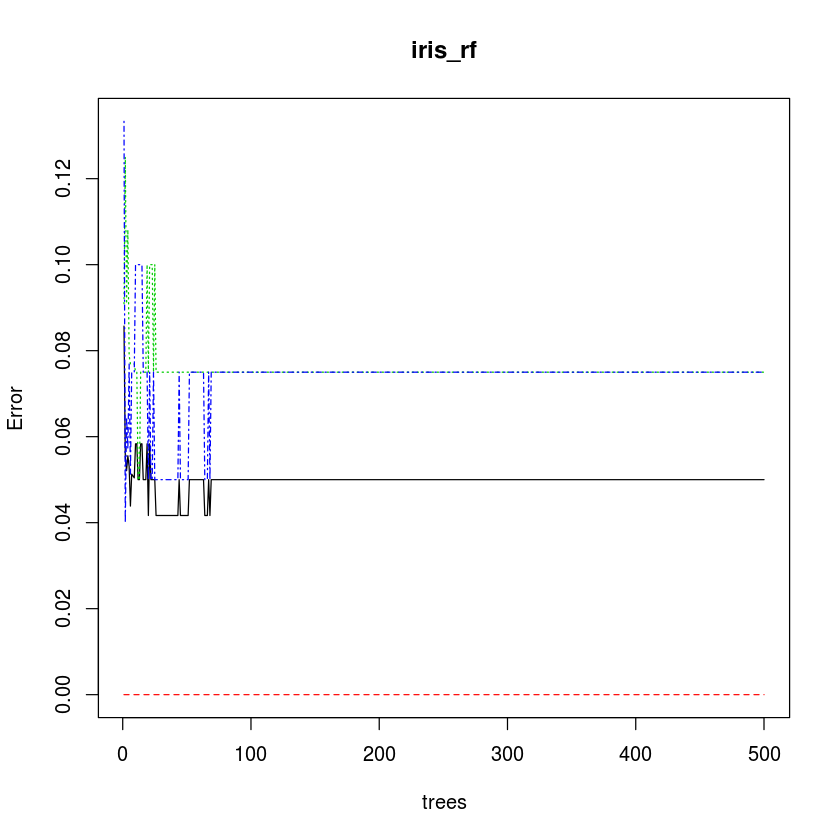

In [9]:
plot(iris_rf)

In [10]:
importance(iris_rf)

,MeanDecreaseGini
SepalLengthCm,8.051299
SepalWidthCm,2.153951
PetalLengthCm,31.584764
PetalWidthCm,37.434486


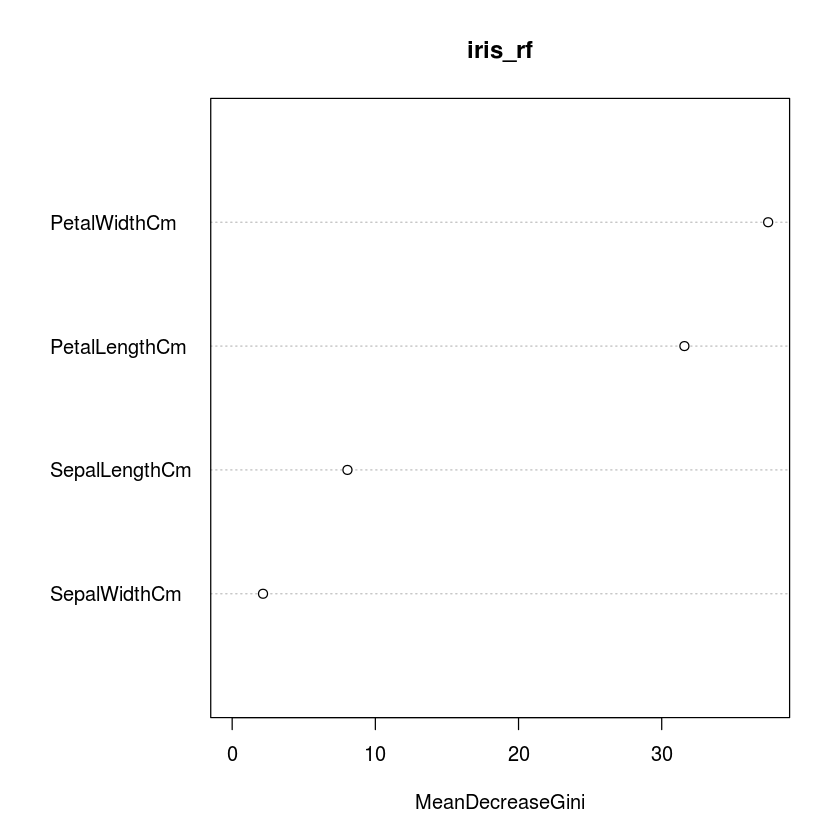

In [11]:
varImpPlot(iris_rf)

In [31]:
irisPred<-predict(iris_rf,newdata=testData)
table(irisPred, testData$Species)

                 
irisPred          Iris-setosa Iris-versicolor Iris-virginica
  Iris-setosa              10               0              0
  Iris-versicolor           0              10              0
  Iris-virginica            0               0             10

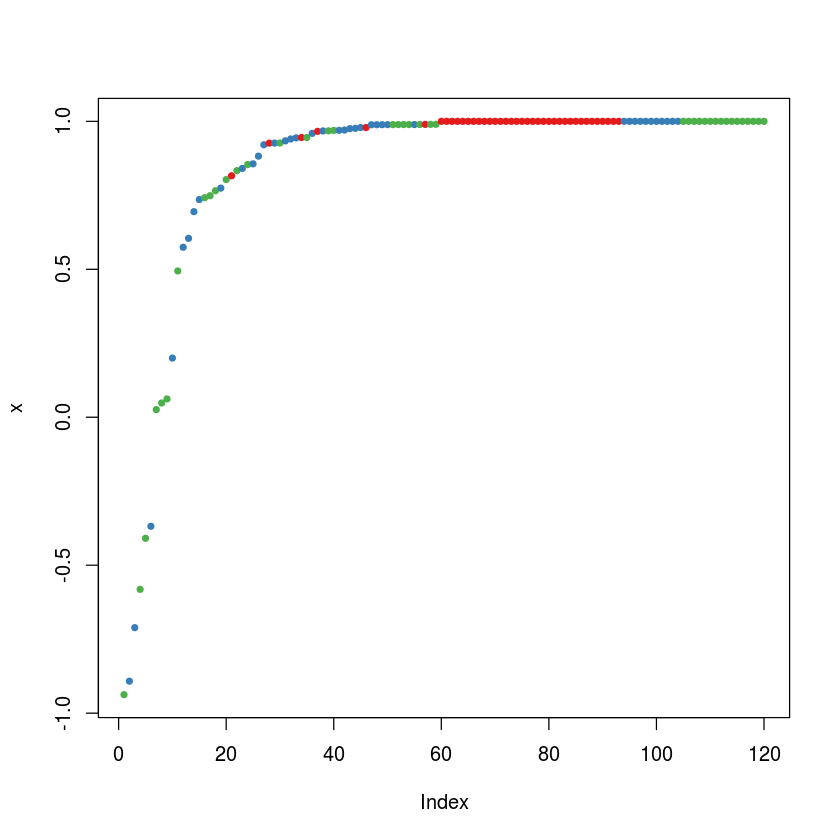

In [30]:
plot(margin(iris_rf,testData$Species))

mtry = 2  OOB error = 4.67% 
Searching left ...
mtry = 4 	OOB error = 4% 
0.1428571 0.05 


Warning message in randomForest.default(x, y, mtry = mtryCur, ntree = ntreeTry, :
“invalid mtry: reset to within valid range”

mtry = 8 	OOB error = 5.33% 
-0.3333333 0.05 
Searching right ...
mtry = 1 	OOB error = 6% 
-0.5 0.05 


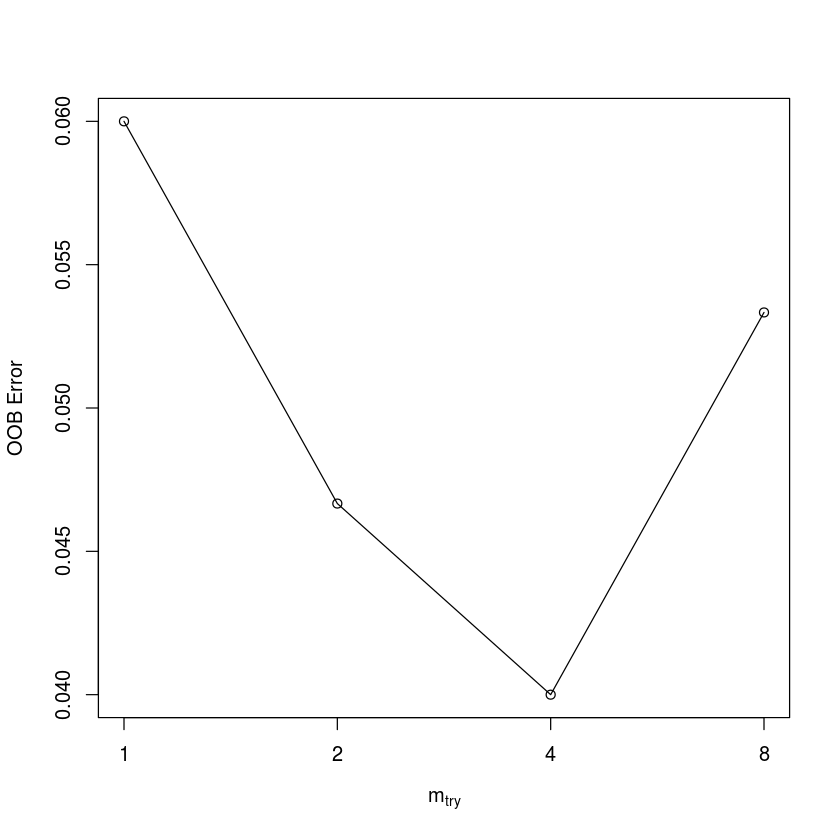

In [23]:
tune.rf <- tuneRF(iris[,-5],iris[,5], stepFactor=0.5)

In [27]:
print(tune.rf)

      mtry   OOBError
1.OOB    1 0.04666667
2.OOB    2 0.06000000
4.OOB    4 0.04000000
8.OOB    8 0.04000000
